# House Price Prediction Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv("Bengaluru_House_Data.csv")
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
housing.shape

(13320, 9)

In [4]:
housing.describe(include='all') 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


#  Data Cleaning

### We have problems which we have to solve before building our model
#### 1.Removing Factors that our not important for our model (availability,society) 
#### 2.Replacing NULL values by dropping the values or replacing them with mean
#### 3.Ensuring all data has similiar dimensions

In [5]:
#Problem 1
housing_copy = housing.copy()
housing.drop(['availability', 'society'], axis=1, inplace=True)

In [6]:
#Problem 2
housing.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
# Droping Missing Values
housing.dropna(subset = ['location', 'size', 'bath'], inplace=True)
housing.shape

(13246, 7)

In [8]:
#Replacing Missing Values with mean
housing['balcony'].replace(np.nan, housing['balcony'].mean(), inplace=True)

In [9]:
housing.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
housing['BHK'] = housing['size'].apply(lambda x: int(x.split(' ')[0]))
housing.drop(['size'], axis=1, inplace=True)
housing.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [11]:
# We can convert these values to float but values with ranges will give us error so we can create a filter type function

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

~housing['total_sqft'].apply(is_float)
Temp_df = housing[~housing['total_sqft'].apply(is_float)]

def check_abnormal(x):
    if '-' in x:
        return False
    else:
        return True

Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].value_counts()


142.61Sq. Meter    2
34.46Sq. Meter     1
1Grounds           1
24Guntha           1
697Sq. Meter       1
1500Cents          1
132Sq. Yards       1
2Acres             1
1100Sq. Meter      1
15Acres            1
1.26Acres          1
151.11Sq. Yards    1
2940Sq. Yards      1
84.53Sq. Meter     1
45.06Sq. Meter     1
1.25Acres          1
86.72Sq. Meter     1
38Guntha           1
6Acres             1
120Sq. Yards       1
24Sq. Meter        1
142.84Sq. Meter    1
2.09Acres          1
122Sq. Yards       1
4125Perch          1
117Sq. Yards       1
1000Sq. Meter      1
1100Sq. Yards      1
5.31Acres          1
30Acres            1
716Sq. Meter       1
1500Sq. Meter      1
1574Sq. Yards      1
361.33Sq. Yards    1
3040Sq. Meter      1
78.03Sq. Meter     1
500Sq. Yards       1
167Sq. Meter       1
315Sq. Yards       1
3Cents             1
188.89Sq. Yards    1
204Sq. Meter       1
45Sq. Yards        1
133.3Sq. Yards     1
300Sq. Yards       1
Name: total_sqft, dtype: int64

In [12]:
len(Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].unique())

45

In [13]:
#Creating Function to Convert different units of land area to ranges to Sq.ft 
def abnormal_change(x):
    if "Sq. Meter" in x:
        num = x.split("S")
        result = float(num[0]) * 10.76
        return result
    if "Perch" in x:
        num = x.split("P")
        result = float(num[0]) * 272.25
        return result
    if "Sq. Yards" in x:
        num = x.split("S")
        result = float(num[0]) * 9.00
        return result
    if "Acres" in x:
        num = x.split("A")
        result = float(num[0]) * 43560.04
        return result
    if "Cents" in x:
        num = x.split("C")
        result = float(num[0]) * 435.56
        return result
    if "Guntha" in x:
        num = x.split("G")
        result = float(num[0]) * 1089.00
        return result
    if "Grounds" in x:
        num = x.split("G")
        result = float(num[0]) * 2400.35
        return result

def convert_range_to_num(x):
    if '-' in x:
        num = x.split('-')
        result1 = (float(num[0]) + float(num[1]))/2
    else:
        bool_val = x.upper().isupper()
        if bool_val == True:
            result1 = abnormal_change(x)
        else:
            result1 = float(x)
    return result1

housing['total_sqft'] = housing['total_sqft'].apply(convert_range_to_num)

In [14]:
housing.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
 6   BHK         13246 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [16]:
housing.rename(columns = {'bath':'bathroom'}, inplace=True)
housing.columns

Index(['area_type', 'location', 'total_sqft', 'bathroom', 'balcony', 'price',
       'BHK'],
      dtype='object')

# Finding Correlations

In [17]:
corr_matrix = housing[['total_sqft', 'bathroom', 'balcony', 'BHK', 'price']].corr()
corr_matrix['price'].sort_values(ascending=False)

price         1.000000
bathroom      0.456350
BHK           0.397222
balcony       0.104212
total_sqft    0.048798
Name: price, dtype: float64

These values show the correlation between the attributes telling us if other attributes increase or decrease w.r.t increase or decrease in MEDV value

+ve value means strong positive correlation which tells us that if we increase MEDV the attribute with a positive value also increase

-ve value means strong negative correlation which tells us that if we decrease MEDV the attribute with a negative value also decreases 

# Trying another Attribute Combination
### we will try a price per sqft combination 

In [18]:
housing['price_per_sqft'] = housing['price']*100000 / housing['total_sqft']
corr_matrix = housing[['total_sqft', 'bathroom', 'balcony', 'BHK', 'price','price_per_sqft']].corr()
corr_matrix['price'].sort_values(ascending=False)

price             1.000000
bathroom          0.456350
BHK               0.397222
balcony           0.104212
total_sqft        0.048798
price_per_sqft    0.028458
Name: price, dtype: float64

By viewing the new correlation matrix we can say that price_per_sqft is a very good combination beacuse it show us very strong positive correlation

#### To increase accuracy of the model we can replace entries which have low count to a similiar entry say "other"

In [19]:
count_location = len(housing['location'].unique())
print(count_location)
pd.set_option('display.max_rows', count_location)
Location_data = housing.groupby('location')['location'].agg('count').sort_values(ascending=False)
Location_data.head(200)

1304


location
Whitefield                     534
Sarjapur  Road                 392
Electronic City                302
Kanakpura Road                 266
Thanisandra                    233
Yelahanka                      210
Uttarahalli                    186
Hebbal                         176
Marathahalli                   175
Raja Rajeshwari Nagar          171
Bannerghatta Road              152
Hennur Road                    150
7th Phase JP Nagar             149
Haralur Road                   141
Electronic City Phase II       131
Rajaji Nagar                   106
Chandapura                      98
Bellandur                       96
KR Puram                        88
Hoodi                           88
Electronics City Phase 1        87
Yeshwanthpur                    85
Begur Road                      84
Sarjapur                        81
Kasavanhalli                    79
Harlur                          79
Banashankari                    74
Hormavu                         74
Ramamurthy 

In [20]:
filt = Location_data <= 15
len(Location_data[filt])

1124

In [21]:
Location_data_less_than_15 = Location_data[filt]
Location_data_less_than_15.head()

location
Varthur Road     15
Chamrajpet       15
Nagavarapalya    15
Kodihalli        15
Benson Town      15
Name: location, dtype: int64

In [22]:
Location_data_less_than_15.tail()

location
 Banaswadi             1
Kanakadasa Layout      1
Kanakapur main road    1
Kanakapura  Rod        1
whitefiled             1
Name: location, dtype: int64

In [23]:
housing['location'] = housing['location'].apply(lambda x: 'Other' if x in Location_data_less_than_15 else x)
print(count_location)
count_location_dimen_red = len(housing['location'].unique())
print(count_location_dimen_red)
housing.head(10)

1304
181


,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,1.584343,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,1.584343,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3,4828.244275
9,Plot Area,Other,1020.0,6.0,1.584343,370.00,6,36274.509804


# Outlier Detection and Removal

#### An outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

### Techniques for detecting outliers
#### 1. Boxplots (used in this model)
#### 2. Z-score
#### 3. Inter Quantile Range(IQR)

### Techniques for removing outliers
#### 1. Trimming/removing the outlier
#### 2. Quantile based flooring and capping(used in this model)
#### 3. Mean/Median imputation(used in this model)

In [24]:
housing_numeric = housing.select_dtypes(include=np.number)
housing_numeric.head(10)

,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,1056.0,2.0,1.000000,39.07,2,3699.810606
1,2600.0,5.0,3.000000,120.00,4,4615.384615
2,1440.0,2.0,3.000000,62.00,3,4305.555556
3,1521.0,3.0,1.000000,95.00,3,6245.890861
4,1200.0,2.0,1.000000,51.00,2,4250.000000
5,1170.0,2.0,1.000000,38.00,2,3247.863248
6,2732.0,4.0,1.584343,204.00,4,7467.057101
7,3300.0,4.0,1.584343,600.00,4,18181.818182
8,1310.0,3.0,1.000000,63.25,3,4828.244275
9,1020.0,6.0,1.584343,370.00,6,36274.509804


In [25]:
housing.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,1.584343,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,1.584343,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3,4828.244275
9,Plot Area,Other,1020.0,6.0,1.584343,370.00,6,36274.509804


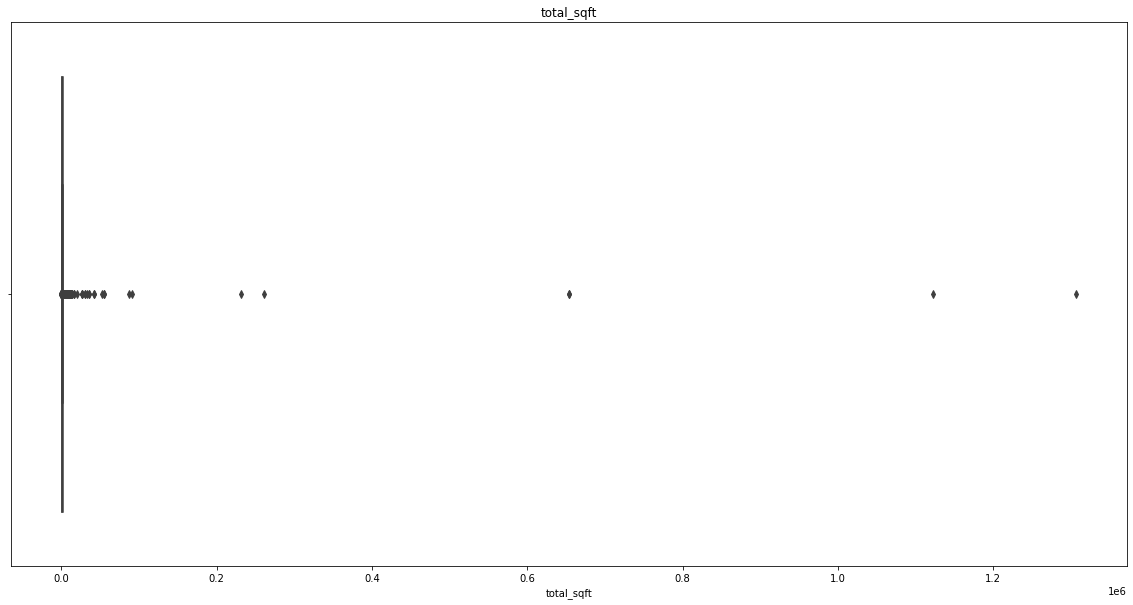

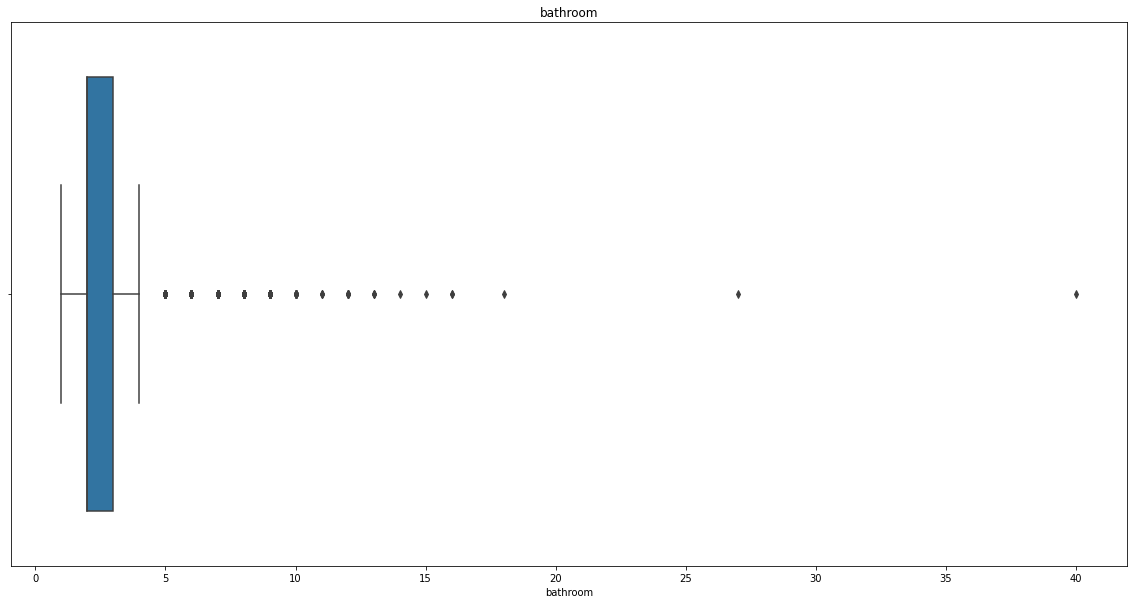

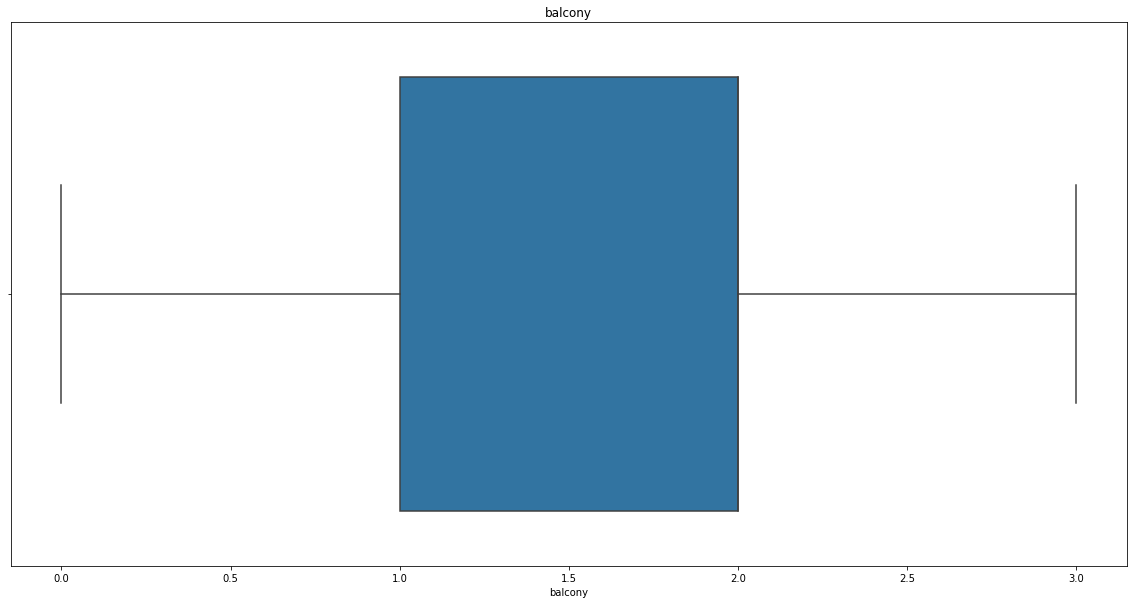

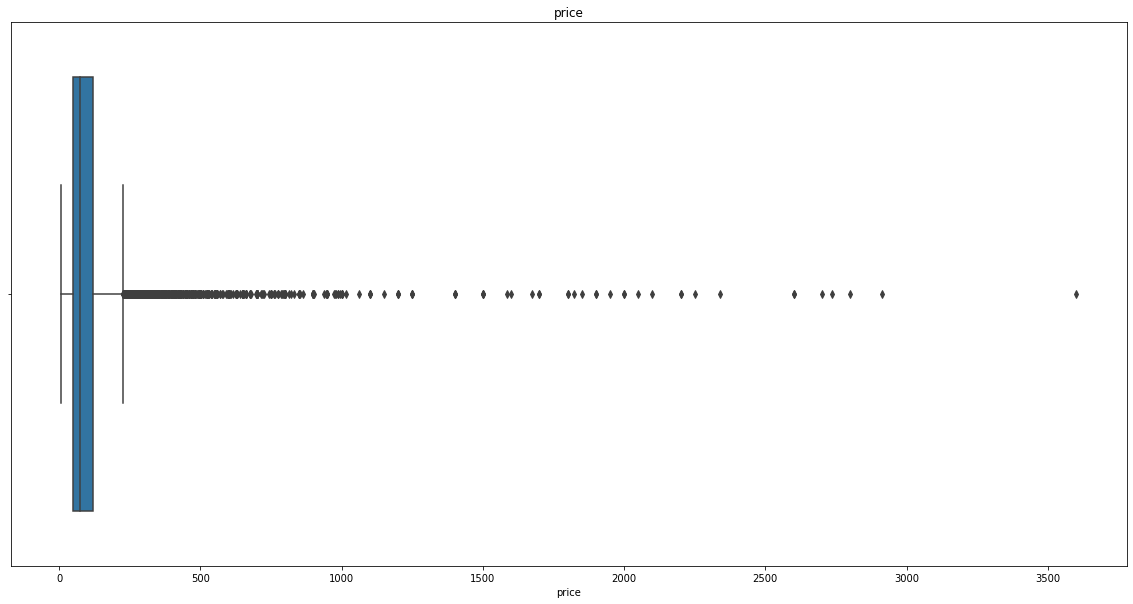

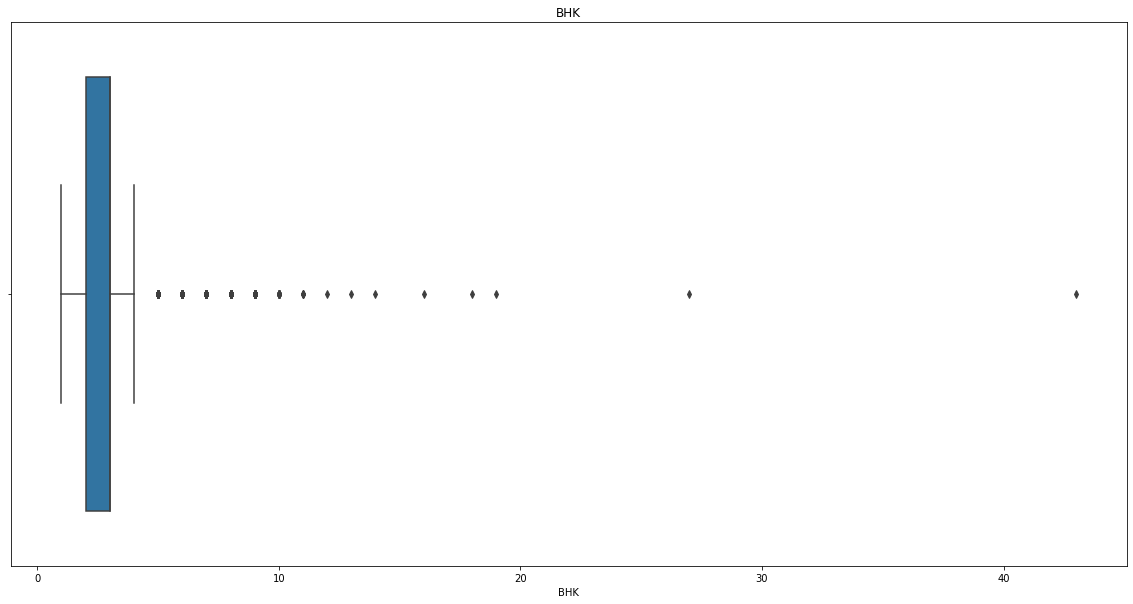

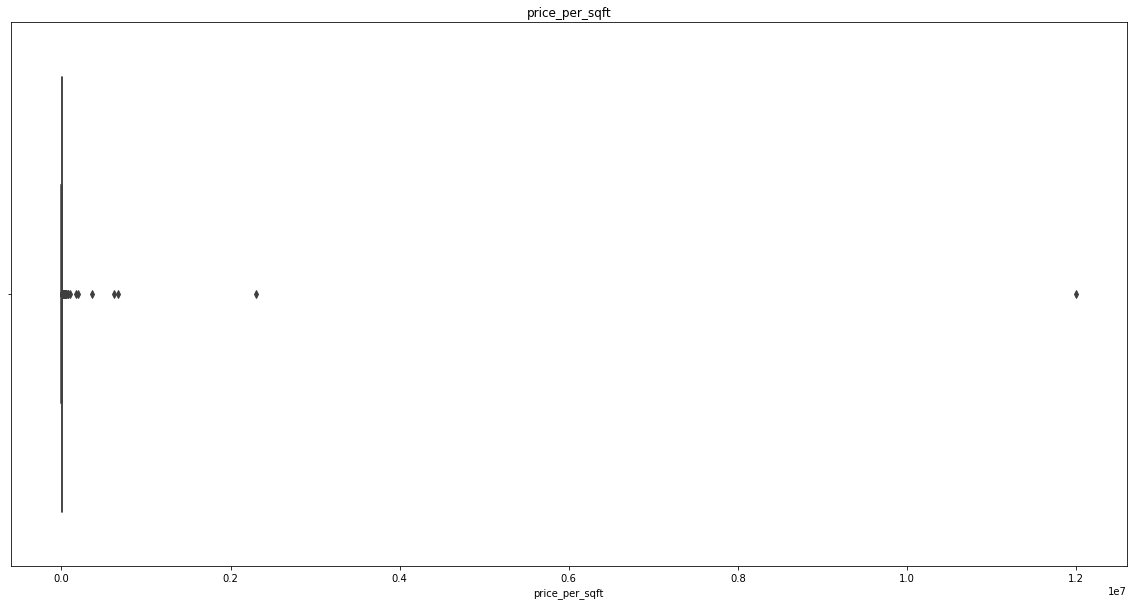

In [26]:
for i in housing_numeric.columns:
    sns.boxplot(x=i, data=housing_numeric)
    plt.title(i)
    plt.show()

##### Outliers are present in total_sqft, bathroom, price, BHK and price_per_sqft

#### total_sqft 

In [27]:
housing['total_sqft'].describe()

count    1.324600e+04
mean     1.909248e+03
std      1.732468e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.275000e+03
75%      1.678750e+03
max      1.306801e+06
Name: total_sqft, dtype: float64

In [28]:
tenth_percentile = housing['total_sqft'].quantile(0.10)
ninetieth_percentile = housing['total_sqft'].quantile(0.90)
housing['total_sqft'] = np.where(housing['total_sqft'] < tenth_percentile, tenth_percentile, housing['total_sqft'])
housing['total_sqft'] = np.where(housing['total_sqft'] > ninetieth_percentile, ninetieth_percentile, housing['total_sqft'])

In [29]:
housing['total_sqft'].describe()

count    13246.000000
mean      1438.315056
std        467.922813
min        900.000000
25%       1100.000000
50%       1275.000000
75%       1678.750000
max       2408.500000
Name: total_sqft, dtype: float64

#### bathroom

In [30]:
housing['bathroom'].describe()

count    13246.000000
mean         2.692586
std          1.341506
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bathroom, dtype: float64

In [31]:
median = housing['bathroom'].quantile(0.50)
upper_out = housing['bathroom'].quantile(0.95)
housing['bathroom'] = np.where(housing['bathroom'] > upper_out, median, housing['bathroom'])

In [32]:
housing['bathroom'].describe()

count    13246.000000
mean         2.492300
std          0.889633
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bathroom, dtype: float64

#### price

In [33]:
housing['price'].describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [34]:
tenth_percentile = housing['price'].quantile(0.10)
ninetieth_percentile = housing['price'].quantile(0.90)
housing['price'] = np.where(housing['price'] < tenth_percentile, tenth_percentile, housing['price'])
housing['price'] = np.where(housing['price'] > ninetieth_percentile, ninetieth_percentile, housing['price'])

In [35]:
housing['price'].describe()

count    13246.000000
mean        93.541210
std         57.585644
min         38.000000
25%         50.000000
50%         72.000000
75%        120.000000
max        220.000000
Name: price, dtype: float64

#### BHK

In [36]:
housing['BHK'].describe()

count    13246.000000
mean         2.801902
std          1.295758
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: BHK, dtype: float64

In [37]:
median = housing['BHK'].quantile(0.50)
upper_out = housing['BHK'].quantile(0.98)
housing['BHK'] = np.where(housing['BHK'] > upper_out, median, housing['BHK'])

In [38]:
housing['BHK'].describe()

count    13246.000000
mean         2.723615
std          1.009848
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: BHK, dtype: float64

In [39]:
housing.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2408.5,5.0,3.000000,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,38.00,2.0,3247.863248
6,Super built-up Area,Old Airport Road,2408.5,4.0,1.584343,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1.584343,220.00,4.0,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.000000,63.25,3.0,4828.244275
9,Plot Area,Other,1020.0,2.0,1.584343,220.00,6.0,36274.509804


##### price_per_sqft

In [40]:
housing['price_per_sqft'].describe()

count    1.324600e+04
mean     7.915284e+03
std      1.065452e+05
min      2.257421e+00
25%      4.262295e+03
50%      5.433101e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [41]:
tenth_percentile = housing['price_per_sqft'].quantile(0.10)
ninetieth_percentile = housing['price_per_sqft'].quantile(0.90)
housing['price_per_sqft'] = np.where(housing['price_per_sqft'] < tenth_percentile, tenth_percentile, housing['price_per_sqft'])
housing['price_per_sqft'] = np.where(housing['price_per_sqft'] > ninetieth_percentile, ninetieth_percentile, housing['price_per_sqft'])

In [42]:
housing['price_per_sqft'].describe()

count    13246.000000
mean      6202.611518
std       2526.207184
min       3500.000000
25%       4262.295082
50%       5433.101240
75%       7317.073171
max      11657.445156
Name: price_per_sqft, dtype: float64

##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [43]:
housing[~(housing['bathroom'] < (housing['BHK'] + 2))].shape

(44, 8)

In [44]:
housing[(housing['bathroom'] < (housing['BHK'] + 2))].shape

(13202, 8)

In [45]:
housing.shape

(13246, 8)

In [46]:
housing = housing[(housing['bathroom'] < (housing['BHK'] + 2))]
housing.shape

(13202, 8)

In [47]:
housing['balcony'] = housing['balcony'].astype('int')

In [48]:
housing.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2408.5,5.0,3,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1,38.00,2.0,3500.000000
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,11657.445156
8,Super built-up Area,Marathahalli,1310.0,3.0,1,63.25,3.0,4828.244275
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0,11657.445156


##### This data set consisits of such entries where the price of a 2BHK is more than the price of a 3BHK which have same area and same location so we take into consideration the price_per_sqft which we made earlier to help us in removing this outlier

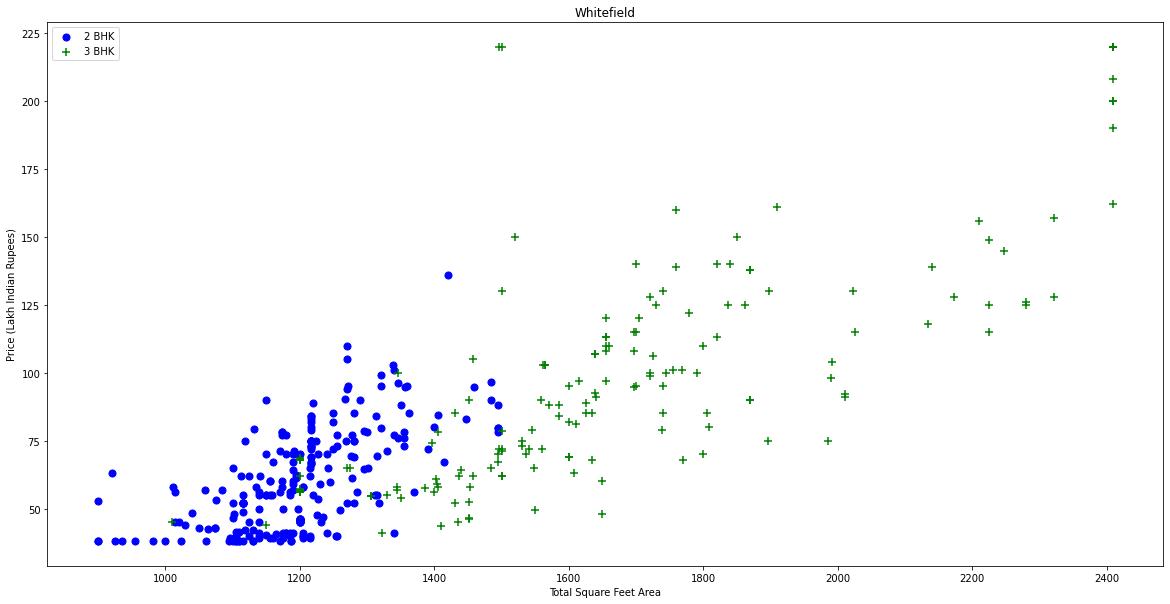

In [49]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(housing,"Whitefield")

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)
housing = remove_bhk_outliers(housing)
housing.shape

(9087, 8)

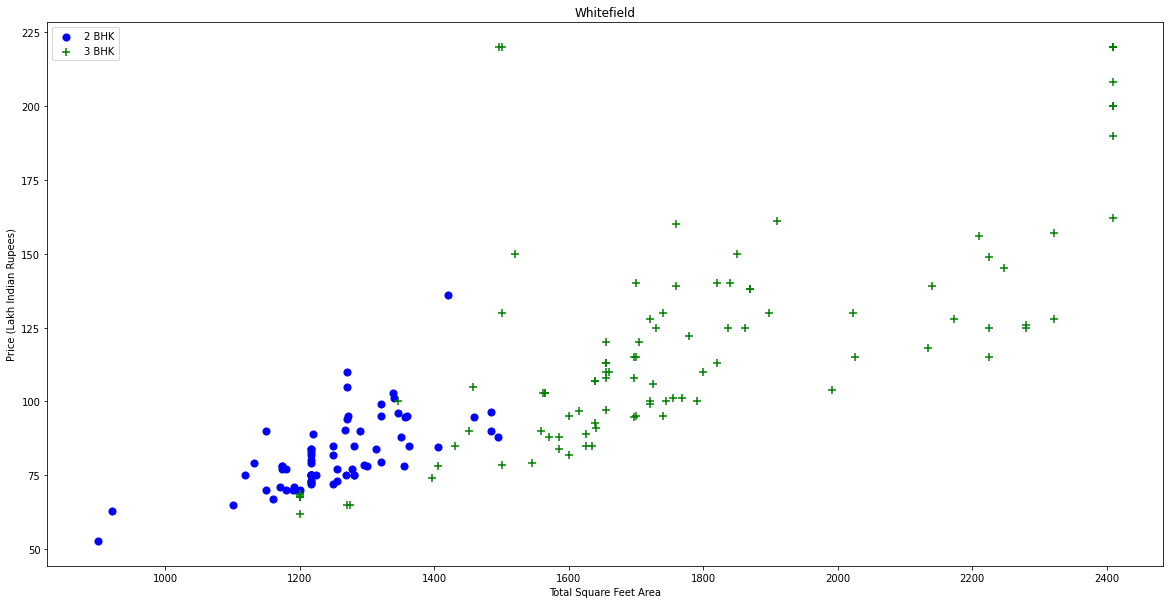

In [51]:
plot_scatter_chart(housing,"Whitefield")

In [52]:
housing.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,3699.810606
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0,4250.000000
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,11657.445156
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0,11657.445156
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0,10592.459605
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0,3800.000000
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0,3636.363636


In [53]:
housing.drop(['price_per_sqft'], axis=1, inplace=True)

In [54]:
housing.head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0
9,Plot Area,Other,1020.0,2.0,1,220.00,6.0
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0


#### In general Square ft per Bedroom is 300 and anything less than that can be considered an outlier

In [55]:
housing[housing.total_sqft/housing.BHK<300].head(10)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
9,Plot Area,Other,1020.0,2.0,1,220.0,6.0
58,Plot Area,Other,1407.0,4.0,1,150.0,6.0
89,Plot Area,Rajaji Nagar,900.0,2.0,3,160.0,6.0
129,Plot Area,Other,950.0,2.0,0,115.0,7.0
149,Plot Area,Other,1034.0,5.0,1,185.0,6.0
176,Plot Area,Kumaraswami Layout,900.0,3.0,2,85.0,5.0
193,Plot Area,Other,1800.0,2.0,1,220.0,7.0
258,Plot Area,Other,1200.0,5.0,1,170.0,5.0
282,Plot Area,Other,1450.0,2.0,0,220.0,6.0
315,Plot Area,Other,1200.0,5.0,2,180.0,5.0


In [56]:
housing=housing[~(housing.total_sqft/housing.BHK<300)]
housing.shape

(8649, 7)

In [57]:
housing.head(20)

,area_type,location,total_sqft,bathroom,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2.0
6,Super built-up Area,Old Airport Road,2408.5,4.0,1,204.00,4.0
7,Super built-up Area,Rajaji Nagar,2408.5,4.0,1,220.00,4.0
11,Plot Area,Whitefield,2408.5,5.0,3,220.00,4.0
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0
13,Built-up Area,Gottigere,1100.0,2.0,2,40.00,2.0
14,Plot Area,Sarjapur,2250.0,3.0,2,148.00,3.0


#### Lets Understand the Categorical Features 
#### Lets Find average price of category from categorical features 

In [58]:
df1 = housing[['area_type', 'price']]
df_g = df1.groupby(['area_type'], as_index=False).mean().sort_values(ascending=False, by='price')
df_g.rename(columns={'price':'avg-price'}, inplace=True)
df_g.set_index('area_type', inplace=True)
df_g

,avg-price
area_type,
Plot Area,154.021639
Built-up Area,100.700418
Super built-up Area,90.998586
Carpet Area,89.057167


In [59]:
df2 = housing[['location', 'price']]
df_l = df2.groupby(['location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_l.rename(columns={'price':'avg-price'}, inplace=True)
df_l.set_index('location', inplace=True)
df_l.head(10)

,avg-price
location,
2nd Stage Nagarbhavi,198.888889
Rajaji Nagar,193.955862
Frazer Town,179.233333
Iblur Village,176.428571
Indira Nagar,174.342857
Cooke Town,171.500000
Malleshwaram,168.213208
Old Airport Road,165.020312
Koramangala,162.037963


In [60]:
df3 = housing[['area_type','location', 'price']]
df_p = df3.groupby(['area_type','location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_p.set_index('area_type', inplace=True)
df_p.rename(columns={'price':'avg-price'}, inplace=True)
df_pivot = pd.pivot_table(df_p, index='area_type', columns='location', values='avg-price')
df_pivot.fillna(0, inplace=True)
df_pivot 

location,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,100.600000,170.0,65.766667,81.0,105.758571,110.600000,84.375000,99.666667,73.216667,140.000,...,51.833478,56.000000,56.000000,119.800000,0.000000,151.283333,128.333333,101.952857,51.555556,112.400000
Carpet Area,0.000000,0.0,0.000000,0.0,0.000000,38.000000,0.000000,0.000000,0.000000,0.000,...,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
Plot Area,210.000000,202.5,206.250000,135.0,172.500000,178.750000,113.400000,120.000000,161.666667,0.000,...,184.666667,115.141250,127.875000,185.285714,0.000000,193.332500,160.000000,130.750000,180.000000,141.666667
Super built-up Area,136.708333,0.0,69.250000,108.5,91.359468,58.483833,57.742222,39.869333,86.770000,86.991,...,54.450297,63.521702,52.423077,87.393913,68.425714,108.226096,74.400000,85.880655,42.538462,91.561970


In [61]:
housing.columns

Index(['area_type', 'location', 'total_sqft', 'bathroom', 'balcony', 'price',
       'BHK'],
      dtype='object')

In [62]:
housing.to_csv("Cleaned_data.csv")

# Model Building

In [63]:
one_dum = pd.get_dummies(housing['area_type'])
housing = pd.concat([housing, one_dum], axis=1)
housing.drop(['area_type'], axis=1, inplace=True)

In [64]:
housing.head(10)

,location,total_sqft,bathroom,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,1056.0,2.0,1,39.07,2.0,0,0,0,1
2,Uttarahalli,1440.0,2.0,3,62.00,3.0,1,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1,95.00,3.0,0,0,0,1
4,Kothanur,1200.0,2.0,1,51.00,2.0,0,0,0,1
6,Old Airport Road,2408.5,4.0,1,204.00,4.0,0,0,0,1
7,Rajaji Nagar,2408.5,4.0,1,220.00,4.0,0,0,0,1
11,Whitefield,2408.5,5.0,3,220.00,4.0,0,0,1,0
12,7th Phase JP Nagar,1000.0,2.0,1,38.00,2.0,0,0,0,1
13,Gottigere,1100.0,2.0,2,40.00,2.0,1,0,0,0
14,Sarjapur,2250.0,3.0,2,148.00,3.0,0,0,1,0


In [65]:
ne_dum = pd.get_dummies(housing['location'])
housing = pd.concat([housing, ne_dum], axis=1)
housing.drop(['location'], axis=1, inplace=True)

In [66]:
housing.head(10)

,total_sqft,bathroom,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,1,39.07,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,62.00,3.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1,95.00,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1,51.00,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2408.5,4.0,1,204.00,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2408.5,4.0,1,220.00,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,2408.5,5.0,3,220.00,4.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12,1000.0,2.0,1,38.00,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,1100.0,2.0,2,40.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2250.0,3.0,2,148.00,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
housing.shape

(8649, 190)

In [68]:
X = housing.drop(['price'], axis=1)
X.shape

(8649, 189)

In [69]:
Y = housing['price']
Y.shape

(8649,)

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.17, random_state=42)
print(f"{X_train.shape} \n {X_test.shape} \n {Y_train.shape} \n {Y_test.shape}")

(7178, 189) 
 (1471, 189) 
 (7178,) 
 (1471,)


In [71]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, Y_train)
Y_pred = LinearModel.predict(X_test)
Y_pred

array([ 57.35594177,  73.93426514,  75.0807972 , ..., 173.53151894,
        63.62428474, 123.63779068])

In [72]:
Y_pred_train = LinearModel.predict(X_train)
Y_pred_train

array([ 45.47550201,  63.34605789,  63.38233948, ...,  56.06871414,
       124.39931488, 188.36610794])

In [73]:
# mse value - Test
MSE = mse(Y_test, Y_pred)
MSE

669.3182392469604

In [74]:
# mse value - train
MSE_t = mse(Y_train, Y_pred_train)
MSE_t

631.1215268148104

In [75]:
# R^2 Value - Train
r2_val_t = LinearModel.score(X_train, Y_train)
r2_val_t

0.8287986476450676

In [76]:
# R^2 Value - Test
r2_val = LinearModel.score(X_test, Y_test)
r2_val

0.8245817863750294

In [77]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8245817863750294

In [78]:
r2_score(Y_train, Y_pred_train)

0.8287986476450676

In [79]:
LinearModel.intercept_

8719386223.052292

In [80]:
for i in range(0, 6):
    print(LinearModel.coef_[i])

0.07695125256481478
5.237991711316969
-0.3345865109885775
6.424831243021686
-8665214558.98715
-8665214556.782269


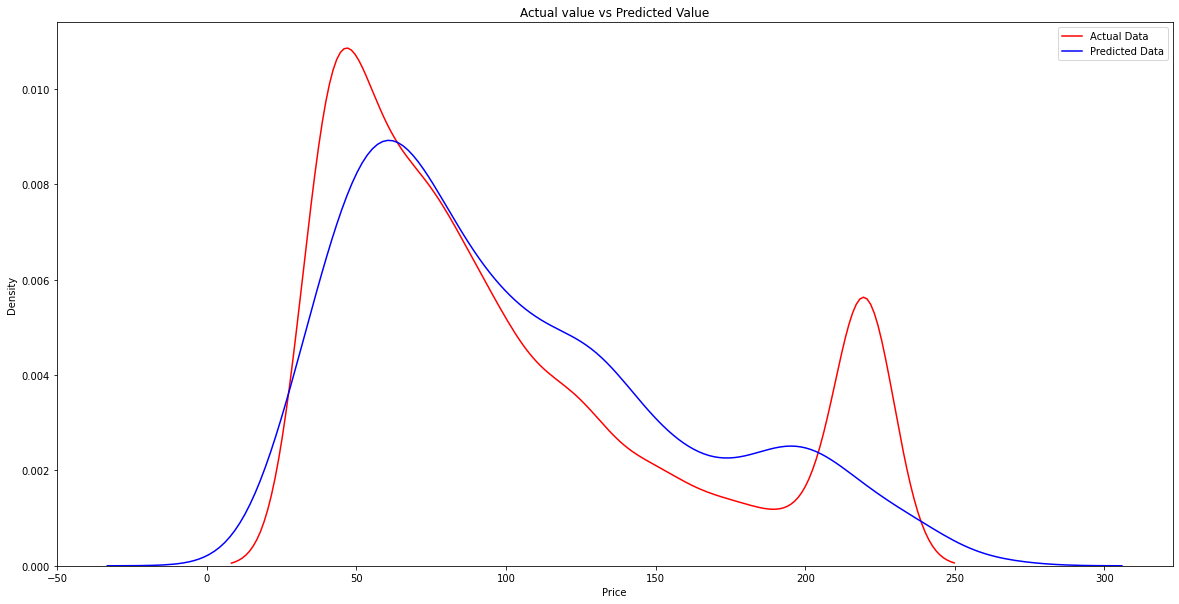

In [81]:
# Dist Plot
axis = sns.distplot(x=Y, hist=False, color='red', label='Actual Data')
sns.distplot(x=Y_pred, hist=False, color='blue', label='Predicted Data', ax=axis)
plt.xlabel('Price')
plt.title('Actual value vs Predicted Value')
plt.legend(loc='best')
plt.show()

In [82]:
cv = KFold(n_splits=8, random_state=None)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.81906226, 0.83416413, 0.82560304, 0.8226559 , 0.8044227 ,
       0.81931007, 0.84248424, 0.80034652])

In [83]:
result = cross_val_score(LinearRegression(), X, Y, cv=cv)
print(f"Average Accuracy - {result.mean()}")

Average Accuracy - 0.8210061073723074


#### What if we Try Decision tree for Regression / Prediction ?

In [84]:
Tree_model = DecisionTreeRegressor(criterion='squared_error', max_depth=6)
Tree_model.fit(X_train, Y_train)
Y_hat = Tree_model.predict(X_test)

In [85]:
# R^2 Value
r2_val_t = Tree_model.score(X_test, Y_test)
r2_val_t

0.8072385236078281

In [86]:
cvt = KFold(n_splits=8, random_state=None)
cross_val_score(DecisionTreeRegressor(criterion='squared_error', max_depth=6), X, Y, cv=cvt)

array([0.81511697, 0.80367522, 0.790366  , 0.79437227, 0.77289503,
       0.7897062 , 0.81893575, 0.77786677])

In [87]:
result_t = cross_val_score(DecisionTreeRegressor(criterion='squared_error', max_depth=6), X, Y, cv=cvt)
print(f"Average Accuracy - {result_t.mean()}")

Average Accuracy - 0.7951724133252334


In [88]:
X.columns

Index(['total_sqft', 'bathroom', 'balcony', 'BHK', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=189)

##### Multiple Linear Regression Model gives better Accuracy than Decision tree

## Exporting the Pickle File 

In [89]:
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as obj:
    pickle.dump(LinearModel, obj)

## Importing Columns 


In [90]:
import json
columns = {
    'Columns': [col.lower() for col in X.columns]
}
with open("Columns.json", 'w') as f:
    f.write(json.dumps(columns))